# Imports

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from ruster import Ruster
import time
import sys
import os

color_1 = "salmon"
color_2 = "deepskyblue"
color_3 = "lightgreen"
    
r = Ruster(path="C:\\Users\\Revive\\PycharmProjects\\Rust_Native_ML\\rust\\PerceptronLib\\target\\release\\PerceptronLib.dll")

print(r.sum([1, 2, 3]))

6


In [8]:
nn = r.create_nn(2, 2, 3, 1)

r.store_nn(nn, 1)

r.release_nn(nn)

In [12]:
nn_loaded = r.load_nn(1)

print(nn_loaded)

value = r.predict_nn(nn_loaded, np.array([1, 2], float), True, 1)

print(value)


r.release_nn(nn_loaded)

1829252938528
[-0.4043581]


# Cas de tests, rendu 2

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [3]:
X = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
])
Y = np.array([
      1,
      1,
      -1
])

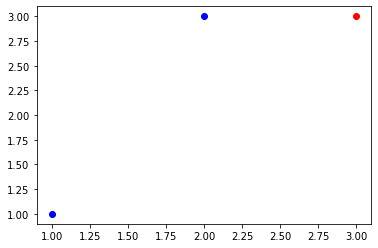

<Figure size 432x288 with 0 Axes>

In [4]:
plt.scatter([p[0] for p in X[:2]], [p[1] for p in X[:2]], c='blue')
plt.scatter([p[0] for p in X[2:]], [p[1] for p in X[2:]], c='red')
plt.show()
plt.clf()

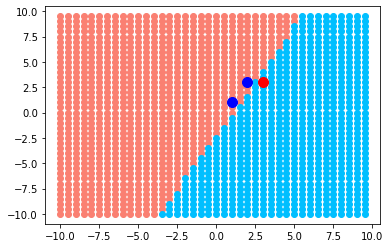

In [357]:
###MLP

XF = X.flatten().tolist()
YF = Y.flatten().tolist()

layer_count = 2
input_count = 2
hidden_count = 3
output_count = 1

nn = r.create_nn(layer_count, input_count, hidden_count, output_count)

r.train_nn(nn, XF, YF, 200, 0.03, True)

points_x1_blue = []
points_x2_blue = []
points_x1_red = []
points_x2_red = []
for i in np.arange(-10.0, 10.0, 0.5):
    for j in np.arange(-10.0, 10.0, 0.5):
        value = r.predict_nn(nn, np.array([i, j], float), True, 1)
        predict = -1.0 if value < 0 else 1.0
        if predict == 1.0:
            points_x1_blue.append(i)
            points_x2_blue.append(j)
        elif predict == -1.0:
            points_x1_red.append(i)
            points_x2_red.append(j)

plt.scatter(points_x1_blue, points_x2_blue, c=color_1)
plt.scatter(points_x1_red, points_x2_red, c=color_2)
plt.scatter([p[0] for p in X[:2]], [p[1] for p in X[:2]], c='blue', s=100)
plt.scatter([p[0] for p in X[2:]], [p[1] for p in X[2:]], c='red', s=100)
plt.show()

r.release_nn(nn)

### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [40]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])

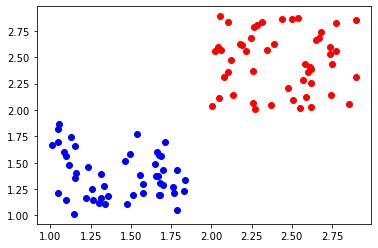

<Figure size 432x288 with 0 Axes>

In [41]:
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()

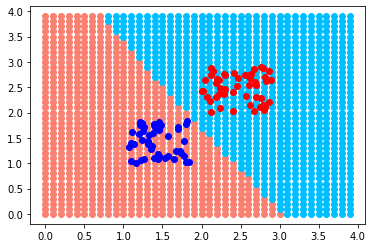

In [334]:
###MLP

XF = X.flatten().tolist()
YF = Y.flatten().tolist()

layer_count = 2
input_count = 2
hidden_count = 3
output_count = 1

nn = r.create_nn(layer_count, input_count, hidden_count, output_count)

r.train_nn(nn, XF, YF, 200, 0.03, True)

points_x1_blue = []
points_x2_blue = []
points_x1_red = []
points_x2_red = []
for i in np.arange(0.0, 4.0, 0.1):
    for j in np.arange(0.0, 4.0, 0.1):
        value = r.predict_nn(nn, np.array([i, j], float), True, 1)
        predict = -1.0 if value < 0 else 1.0
        if predict == 1.0:
            points_x1_blue.append(i)
            points_x2_blue.append(j)
        elif predict == -1.0:
            points_x1_red.append(i)
            points_x2_red.append(j)

plt.scatter(points_x1_blue, points_x2_blue, c=color_1)
plt.scatter(points_x1_red, points_x2_red, c=color_2)
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()

r.release_nn(nn)

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

In [316]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y = np.array([1, 1, -1, -1])

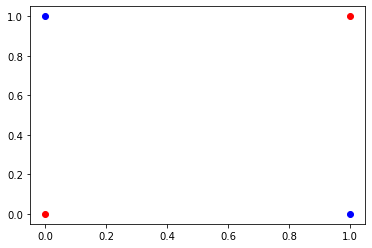

<Figure size 432x288 with 0 Axes>

In [317]:
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

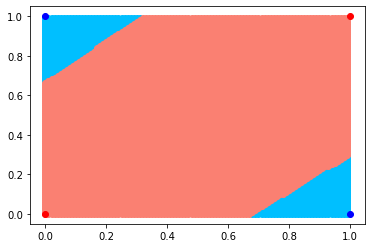

In [327]:
###MLP

XF = X.flatten().tolist()
YF = Y.flatten().tolist()

layer_count = 2
input_count = 2
hidden_count = 3
output_count = 1

nn = r.create_nn(layer_count, input_count, hidden_count, output_count)

r.train_nn(nn, XF, YF, 200, 0.03, True)

points_x1_blue = []
points_x2_blue = []
points_x1_red = []
points_x2_red = []
for i in np.arange(0.0, 1.0, 0.01):
    for j in np.arange(0.0, 1.0, 0.01):
        value = r.predict_nn(nn, np.array([i, j], float), True, 1)
        predict = -1.0 if value < 0 else 1.0
        if predict == 1.0:
            points_x1_blue.append(i)
            points_x2_blue.append(j)
        elif predict == -1.0:
            points_x1_red.append(i)
            points_x2_red.append(j)

plt.scatter(points_x1_blue, points_x2_blue, c=color_1)
plt.scatter(points_x1_red, points_x2_red, c=color_2)
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()

r.release_nn(nn)

























































































### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

In [5]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

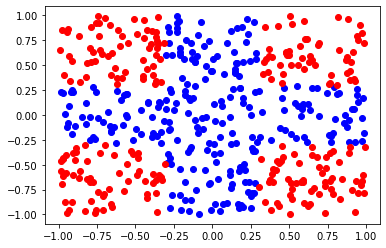

<Figure size 432x288 with 0 Axes>

In [359]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

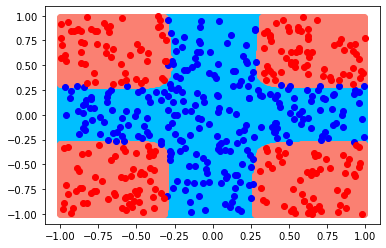

In [77]:
###MLP

XF = X.flatten().tolist()
YF = Y.flatten().tolist()

color_2 = "salmon"
color_1 = "deepskyblue"

layer_count = 2
input_count = 2
hidden_count = 5
output_count = 1

nn = r.create_nn(layer_count, input_count, hidden_count, output_count)

r.train_nn(nn, XF, YF, 1000, 0.01, True)

points_x1_blue = []
points_x2_blue = []
points_x1_red = []
points_x2_red = []
for i in np.arange(-1.0, 1.0, 0.01):
    for j in np.arange(-1.0, 1.0, 0.01):
        value = r.predict_nn(nn, np.array([i, j], float), True, 1)
        predict = -1.0 if value < 0 else 1.0
        if predict == 1.0:
            points_x1_blue.append(i)
            points_x2_blue.append(j)
        elif predict == -1.0:
            points_x1_red.append(i)
            points_x2_red.append(j)

plt.scatter(points_x1_blue, points_x2_blue, c=color_1)
plt.scatter(points_x1_red, points_x2_red, c=color_2)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()

r.release_nn(nn)

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [40]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else 
              [0, 0, 0]for p in X])
X = X[[not np.all(arr == [0, 0, 0]) for arr in Y]]
Y = Y[[not np.all(arr == [0, 0, 0]) for arr in Y]]

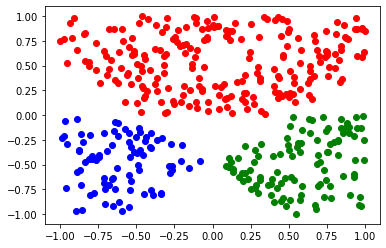

<Figure size 432x288 with 0 Axes>

In [5]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

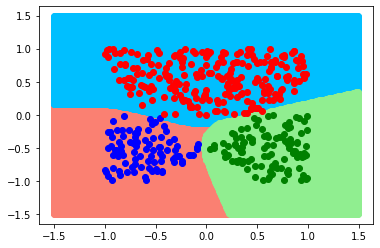

In [67]:
def index(lis):
    count = 0
    elt = 0
    for i in range(0, len(lis)):
        if(lis[i] > elt):
            count = i
            elt = lis[i]
    return count
    
            
###MLP

XF = X.flatten().tolist()
YF = Y.flatten().tolist()

layer_count = 3
input_count = 2
hidden_count = 8
output_count = 3

nn = r.create_nn(layer_count, input_count, hidden_count, output_count)

r.train_nn(nn, XF, YF, 1000, 0.01, True)

points_x1_blue = []
points_x2_blue = []
points_x1_red = []
points_x2_red = []
points_x1_green = []
points_x2_green = []
for i in np.arange(-1.5, 1.5, 0.01):
    for j in np.arange(-1.5, 1.5, 0.01):
        value = r.predict_nn(nn, np.array([i, j], float), True, output_count).tolist()
#         print(value)
        idx = index(value)
#         print(idx)
        if idx == 0:
            points_x1_blue.append(i)
            points_x2_blue.append(j)
        elif idx == 1:
            points_x1_red.append(i)
            points_x2_red.append(j)
        elif idx == 2:
            points_x1_green.append(i)
            points_x2_green.append(j)

plt.scatter(points_x1_blue, points_x2_blue, c=color_1)
plt.scatter(points_x1_red, points_x2_red, c=color_2)
plt.scatter(points_x1_green, points_x2_green, c=color_3)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()

r.release_nn(nn)

### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [2]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

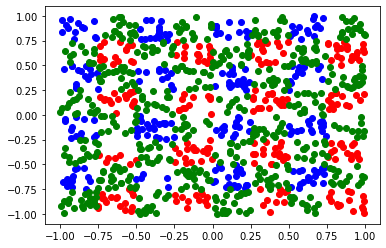

<Figure size 432x288 with 0 Axes>

In [14]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

_


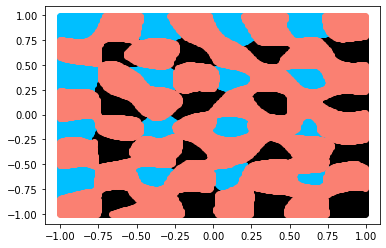

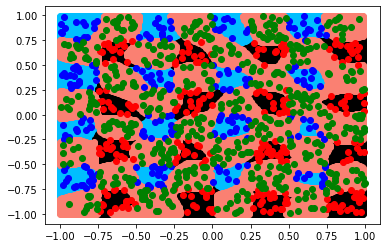

217.64624786376953


In [8]:
def index(lis):
    count = 0
    elt = 0
    for i in range(0, len(lis)):
        if(lis[i] > elt):
            count = i
            elt = lis[i]
    return count

t1 = time.time()

color_1 = "deepskyblue"
color_2 = "black"
color_3 = "salmon"    
            
###MLP

XF = X.flatten().tolist()
YF = Y.flatten().tolist()

layer_count = 3
input_count = 2
hidden_count = 25
output_count = 3

nn = r.create_nn(layer_count, input_count, hidden_count, output_count)

print("_")
r.train_nn(nn, XF, YF, 50000, 0.001, True)

points_x1_blue = []
points_x2_blue = []
points_x1_red = []
points_x2_red = []
points_x1_green = []
points_x2_green = []
for i in np.arange(-1.0, 1.0, 0.01):
    for j in np.arange(-1.0, 1.0, 0.01):
        value = r.predict_nn(nn, np.array([i, j], float), True, output_count).tolist()
#         print(value)
        idx = index(value)
#         print(idx)
        if idx == 0:
            points_x1_blue.append(i)
            points_x2_blue.append(j)
        elif idx == 1:
            points_x1_red.append(i)
            points_x2_red.append(j)
        elif idx == 2:
            points_x1_green.append(i)
            points_x2_green.append(j)

plt.scatter(points_x1_blue, points_x2_blue, c=color_1)
plt.scatter(points_x1_red, points_x2_red, c=color_2)
plt.scatter(points_x1_green, points_x2_green, c=color_3)
plt.show()

plt.scatter(points_x1_blue, points_x2_blue, c=color_1)
plt.scatter(points_x1_red, points_x2_red, c=color_2)
plt.scatter(points_x1_green, points_x2_green, c=color_3)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()

r.release_nn(nn)

t2 = time.time()
print(t2 - t1)

_
[0.4483862817287445, 0.12018481642007828, 0.24947980046272278]
[0.4567171037197113, 0.13551513850688934, 0.23961001634597778]
[0.4648142457008362, 0.15040357410907745, 0.22989614307880402]
[0.47268086671829224, 0.1648448258638382, 0.2203441560268402]
[0.48031964898109436, 0.17883722484111786, 0.21095840632915497]
[0.48773419857025146, 0.19237841665744781, 0.20174264907836914]
[0.49492737650871277, 0.20546917617321014, 0.19270078837871552]
[0.5019040107727051, 0.21811151504516602, 0.18383613228797913]
[0.5086672306060791, 0.23030799627304077, 0.17514951527118683]
[0.5152208209037781, 0.2420622557401657, 0.16664451360702515]
[0.5215690732002258, 0.25337904691696167, 0.158321350812912]
[0.5277160406112671, 0.26426395773887634, 0.15018068253993988]
[0.5336661338806152, 0.2747231721878052, 0.1422242373228073]
[0.5394231677055359, 0.28476402163505554, 0.13445131480693817]
[0.5449916124343872, 0.294393390417099, 0.12686115503311157]
[0.5503754615783691, 0.30361923575401306, 0.11945386230945

[0.511310875415802, 0.21206802129745483, 0.20485490560531616]
[0.5174760222434998, 0.22378550469875336, 0.19629551470279694]
[0.5234460234642029, 0.2350660115480423, 0.18792083859443665]
[0.52922523021698, 0.2459152787923813, 0.17973308265209198]
[0.5348177552223206, 0.2563396096229553, 0.1717318445444107]
[0.5402275919914246, 0.2663450837135315, 0.16391907632350922]
[0.5454586744308472, 0.27593857049942017, 0.1562941074371338]
[0.5505151152610779, 0.285128653049469, 0.1488565057516098]
[0.5554012656211853, 0.2939232289791107, 0.1416059136390686]
[0.5601209402084351, 0.30233052372932434, 0.1345408707857132]
[0.5646784901618958, 0.31035926938056946, 0.12766064703464508]
[0.5690776109695435, 0.3180188536643982, 0.12096332758665085]
[0.5733222961425781, 0.3253180980682373, 0.11444739252328873]
[0.577416718006134, 0.33226585388183594, 0.10811043530702591]
[0.5813643932342529, 0.3388712406158447, 0.10195009410381317]
[0.5851696729660034, 0.3451441526412964, 0.09596467763185501]
[0.588835358

[0.500313401222229, 0.4043048918247223, 0.14357130229473114]
[0.4976098835468292, 0.408393919467926, 0.14044775068759918]
[0.4949183762073517, 0.41275864839553833, 0.13693229854106903]
[0.4922390580177307, 0.4174063205718994, 0.13301260769367218]
[0.48957356810569763, 0.422344446182251, 0.12867477536201477]
[0.48692333698272705, 0.42757856845855713, 0.12390776723623276]
[0.484287828207016, 0.4331125020980835, 0.11869894713163376]
[0.4816685914993286, 0.43894949555397034, 0.11303840577602386]
[0.47906509041786194, 0.4450894296169281, 0.10691652446985245]
[0.47647765278816223, 0.45153293013572693, 0.10032354295253754]
[0.47390615940093994, 0.45827704668045044, 0.09325256198644638]
[0.4713505506515503, 0.46531760692596436, 0.08569646626710892]
[0.46880921721458435, 0.47264862060546875, 0.07765142619609833]
[0.46628236770629883, 0.4802626967430115, 0.06911138445138931]
[0.4637679159641266, 0.48814964294433594, 0.06007542461156845]
[0.46126559376716614, 0.49629923701286316, 0.05054084584116

[0.47690707445144653, 0.49156707525253296, 0.04966944083571434]
[0.4760229289531708, 0.5038849711418152, 0.03621236979961395]
[0.4751659631729126, 0.5163759589195251, 0.022257167845964432]
[0.4743318557739258, 0.5290064215660095, 0.007818792946636677]
[0.47351768612861633, 0.5417436361312866, -0.007086158264428377]
[0.472718209028244, 0.5545529723167419, -0.02243867889046669]
[0.4719310402870178, 0.567401111125946, -0.03821980953216553]
[0.4711509346961975, 0.5802537798881531, -0.054405394941568375]
[0.4703735411167145, 0.5930790305137634, -0.07097256928682327]
[0.4695953130722046, 0.6058441996574402, -0.08789484947919846]
[0.4688112437725067, 0.6185186505317688, -0.10514452308416367]
[0.4680163860321045, 0.6310728192329407, -0.12269286811351776]
[0.4253418743610382, -0.04962502792477608, 0.41450947523117065]
[0.4333290159702301, -0.032472990453243256, 0.4040505588054657]
[0.4411061704158783, -0.01564018987119198, 0.3936667740345001]
[0.44867339730262756, 0.0008526293095201254, 0.38336

[0.48678058385849, 0.027475444599986076, 0.39050158858299255]
[0.4927867650985718, 0.04196951538324356, 0.38088199496269226]
[0.4986017644405365, 0.05607609450817108, 0.3713870942592621]
[0.504227340221405, 0.06978525966405869, 0.36202505230903625]
[0.5096661448478699, 0.08309157937765121, 0.35280460119247437]
[0.514920711517334, 0.09598865360021591, 0.34373313188552856]
[0.5199939608573914, 0.10847430676221848, 0.33481675386428833]
[0.5248887538909912, 0.12054610252380371, 0.3260616660118103]
[0.5296083092689514, 0.1322028636932373, 0.31747373938560486]
[0.5341556072235107, 0.14344502985477448, 0.30905741453170776]
[0.5385344624519348, 0.15427523851394653, 0.30081748962402344]
[0.542747974395752, 0.16469556093215942, 0.2927568554878235]
[0.5468001365661621, 0.17471002042293549, 0.2848793566226959]
[0.5506938099861145, 0.18432310223579407, 0.2771869897842407]
[0.5544335246086121, 0.1935402750968933, 0.26968225836753845]
[0.558022141456604, 0.20236758887767792, 0.26236653327941895]
[0.5

[0.5308986306190491, 0.19428670406341553, 0.2812550663948059]
[0.5294674634933472, 0.1920807957649231, 0.28314757347106934]
[0.528019905090332, 0.18990516662597656, 0.2849750816822052]
[0.5265576839447021, 0.18777596950531006, 0.28672894835472107]
[0.5250834822654724, 0.18571121990680695, 0.28839853405952454]
[0.5235997438430786, 0.183730348944664, 0.28997284173965454]
[0.5221095085144043, 0.18185478448867798, 0.2914401590824127]
[0.5206154584884644, 0.1801067590713501, 0.2927878499031067]
[0.5191210508346558, 0.1785093992948532, 0.2940029501914978]
[0.5176301598548889, 0.1770883947610855, 0.29507166147232056]
[0.5161460041999817, 0.17586873471736908, 0.2959786653518677]
[0.514673113822937, 0.17487891018390656, 0.2967092990875244]
[0.5132151246070862, 0.17414553463459015, 0.29724767804145813]
[0.511776328086853, 0.1736978143453598, 0.2975776791572571]
[0.5103614330291748, 0.17356429994106293, 0.2976822853088379]
[0.508974552154541, 0.1737748384475708, 0.29754483699798584]
[0.5076207518

[0.4943065643310547, 0.20158308744430542, 0.2729986310005188]
[0.49378907680511475, 0.2082686871290207, 0.2680170238018036]
[0.49334123730659485, 0.2156251072883606, 0.2625904679298401]
[0.4929659962654114, 0.22366027534008026, 0.2567054033279419]
[0.4926655888557434, 0.23238089680671692, 0.25034981966018677]
[0.49244195222854614, 0.24178916215896606, 0.24351094663143158]
[0.49229690432548523, 0.25188419222831726, 0.23617884516716003]
[0.49223190546035767, 0.26266080141067505, 0.22834350168704987]
[0.4922475516796112, 0.27410978078842163, 0.21999520063400269]
[0.49234500527381897, 0.2862189710140228, 0.2111266851425171]
[0.49252498149871826, 0.29897063970565796, 0.20173107087612152]
[0.4927862882614136, 0.31234341859817505, 0.19180332124233246]
[0.49312952160835266, 0.32631203532218933, 0.1813398003578186]
[0.49355363845825195, 0.34084632992744446, 0.17033688724040985]
[0.49405789375305176, 0.3559136688709259, 0.15879440307617188]
[0.4946405291557312, 0.3714756965637207, 0.146712139248

[0.5511743426322937, 0.26978662610054016, 0.22270344197750092]
[0.5496575832366943, 0.26877355575561523, 0.2239963412284851]
[0.5481548309326172, 0.26776883006095886, 0.22532770037651062]
[0.5466679930686951, 0.26677486300468445, 0.22669444978237152]
[0.5452003479003906, 0.26579439640045166, 0.22809316217899323]
[0.5437535643577576, 0.2648300528526306, 0.22952017188072205]
[0.5423305630683899, 0.26388460397720337, 0.23097297549247742]
[0.5409335494041443, 0.2629600465297699, 0.23244798183441162]
[0.5395642518997192, 0.26205798983573914, 0.23394209146499634]
[0.5382254123687744, 0.2611805200576782, 0.23545299470424652]
[0.5369184613227844, 0.2603296935558319, 0.2369760125875473]
[0.5356458425521851, 0.25950586795806885, 0.2385096698999405]
[0.5344088673591614, 0.25871121883392334, 0.24005085229873657]
[0.5332093238830566, 0.2579459846019745, 0.24159617722034454]
[0.5320488810539246, 0.25721123814582825, 0.24314402043819427]
[0.5309287309646606, 0.25650736689567566, 0.24469046294689178]


[0.5235728025436401, 0.2753531336784363, 0.24017512798309326]
[0.5223222970962524, 0.2747793197631836, 0.24164719879627228]
[0.5211155414581299, 0.2742369472980499, 0.2431127429008484]
[0.5199542045593262, 0.2737262547016144, 0.24456816911697388]
[0.5188400149345398, 0.27324792742729187, 0.2460116446018219]
[0.5177744030952454, 0.2728029489517212, 0.24744011461734772]
[0.5167586803436279, 0.27239006757736206, 0.24885164201259613]
[0.5157942175865173, 0.2720094621181488, 0.2502445578575134]
[0.5148817300796509, 0.2716611623764038, 0.2516162693500519]
[0.5140224099159241, 0.27134382724761963, 0.25296536087989807]
[0.513216495513916, 0.27105677127838135, 0.2542896866798401]
[0.5124650001525879, 0.2707987427711487, 0.2555878758430481]
[0.511768102645874, 0.2705683410167694, 0.256858229637146]
[0.5111258029937744, 0.2703641951084137, 0.25809937715530396]
[0.5105384588241577, 0.2701844274997711, 0.2593103051185608]
[0.5100053548812866, 0.27002662420272827, 0.26048916578292847]
[0.50952666997

[0.5071750283241272, 0.29376906156539917, 0.24322368204593658]
[0.5070520043373108, 0.293789803981781, 0.24410702288150787]
[0.5069788694381714, 0.29382291436195374, 0.24495364725589752]
[0.5069550275802612, 0.293865829706192, 0.24576283991336823]
[0.5069785118103027, 0.29391559958457947, 0.2465340942144394]
[0.5070489645004272, 0.29397010803222656, 0.24726851284503937]
[0.5071641206741333, 0.294026255607605, 0.2479655146598816]
[0.5073227286338806, 0.2940809726715088, 0.24862511456012726]
[0.5075234770774841, 0.29413238167762756, 0.24924787878990173]
[0.5077639222145081, 0.2941769063472748, 0.24983392655849457]
[0.5080426931381226, 0.2942119240760803, 0.25038355588912964]
[0.5083571076393127, 0.2942352294921875, 0.25089696049690247]
[0.5087056756019592, 0.2942429482936859, 0.25137439370155334]
[0.5090854167938232, 0.29423314332962036, 0.2518160939216614]
[0.5094945430755615, 0.294202983379364, 0.2522227168083191]
[0.509930431842804, 0.2941505014896393, 0.25259390473365784]
[0.51039040

[0.5471815466880798, 0.2403530329465866, 0.2743232846260071]
[0.54886394739151, 0.2471795678138733, 0.26713457703590393]
[0.550439715385437, 0.25369611382484436, 0.26018428802490234]
[0.5519102811813354, 0.25990816950798035, 0.2534753084182739]
[0.553276777267456, 0.26582014560699463, 0.24700844287872314]
[0.5545409321784973, 0.2714369297027588, 0.24078625440597534]
[0.5557040572166443, 0.27676451206207275, 0.23480910062789917]
[0.5567683577537537, 0.28180864453315735, 0.22907716035842896]
[0.5577349662780762, 0.2865760326385498, 0.22358889877796173]
[0.5586062669754028, 0.29107365012168884, 0.21834343671798706]
[0.5593841075897217, 0.29530805349349976, 0.21334019303321838]
[0.5600700378417969, 0.2992861866950989, 0.20857656002044678]
[0.5606667399406433, 0.30301550030708313, 0.20404960215091705]
[0.5611761212348938, 0.30650395154953003, 0.19975750148296356]
[0.5616002082824707, 0.30975866317749023, 0.19569651782512665]
[0.5619412660598755, 0.3127868175506592, 0.1918632984161377]
[0.56

[0.5471338033676147, 0.3525466024875641, 0.12362051010131836]
[0.5466070175170898, 0.3520650565624237, 0.12384513020515442]
[0.5460680723190308, 0.35153570771217346, 0.1241605207324028]
[0.5455184578895569, 0.35096246004104614, 0.12456267327070236]
[0.5449604392051697, 0.35034918785095215, 0.12504634261131287]
[0.5443951487541199, 0.3496999740600586, 0.12560778856277466]
[0.5438245534896851, 0.34901872277259827, 0.12624123692512512]
[0.5432504415512085, 0.34830954670906067, 0.12694402039051056]
[0.5426743626594543, 0.34757542610168457, 0.1277107149362564]
[0.542097806930542, 0.3468199074268341, 0.12853799760341644]
[0.5415222644805908, 0.3460463285446167, 0.1294218748807907]
[0.5409495830535889, 0.3452586829662323, 0.13035720586776733]
[0.5403808951377869, 0.34445878863334656, 0.13134139776229858]
[0.5398178100585938, 0.34365028142929077, 0.13237062096595764]
[0.5392616987228394, 0.34283584356307983, 0.13344117999076843]
[0.5387142896652222, 0.3420179784297943, 0.13454899191856384]
[0.

[0.5466070771217346, 0.32694679498672485, 0.1540575921535492]
[0.5468125343322754, 0.32651177048683167, 0.15543371438980103]
[0.5470328330993652, 0.3260979652404785, 0.15679165720939636]
[0.5472672581672668, 0.3257049024105072, 0.15812958776950836]
[0.5475156307220459, 0.3253324329853058, 0.15944771468639374]
[0.5477779507637024, 0.3249801695346832, 0.16074340045452118]
[0.5480536222457886, 0.32464727759361267, 0.16201570630073547]
[0.5483424663543701, 0.3243342339992523, 0.16326342523097992]
[0.548643946647644, 0.3240410089492798, 0.16448578238487244]
[0.548957884311676, 0.32376688718795776, 0.16568121314048767]
[0.5492833852767944, 0.3235117197036743, 0.16684812307357788]
[0.5496202111244202, 0.3232760429382324, 0.1679857075214386]
[0.5499681234359741, 0.32305908203125, 0.16909193992614746]
[0.5503261685371399, 0.32286155223846436, 0.17016582190990448]
[0.5506937503814697, 0.3226841986179352, 0.1712060272693634]
[0.5510708093643188, 0.3225267231464386, 0.17221088707447052]
[0.5514557

[0.5694971084594727, 0.3183034360408783, 0.19495007395744324]
[0.5695945024490356, 0.3196415901184082, 0.19396622478961945]
[0.5696772336959839, 0.32111209630966187, 0.19283130764961243]
[0.5697453618049622, 0.3227212429046631, 0.19154028594493866]
[0.5697975158691406, 0.3244763910770416, 0.19008679687976837]
[0.5698333382606506, 0.32638466358184814, 0.18846452236175537]
[0.5698518753051758, 0.3284527659416199, 0.18666784465312958]
[0.5698520541191101, 0.33068737387657166, 0.18468992412090302]
[0.569832980632782, 0.33309587836265564, 0.18252453207969666]
[0.5697937607765198, 0.335684597492218, 0.18016541004180908]
[0.5697333216667175, 0.33846017718315125, 0.17760613560676575]
[0.5696505308151245, 0.341429203748703, 0.1748407483100891]
[0.5695445537567139, 0.34459826350212097, 0.171861931681633]
[0.5694144368171692, 0.3479733169078827, 0.1686638444662094]
[0.569258451461792, 0.35155990719795227, 0.16524076461791992]
[0.5690755844116211, 0.3553631603717804, 0.16158531606197357]
[0.568864

[0.566150963306427, 0.32207536697387695, 0.13810674846172333]
[0.5665041208267212, 0.3209734857082367, 0.13970480859279633]
[0.5668478608131409, 0.31986379623413086, 0.14137402176856995]
[0.567181408405304, 0.3187468945980072, 0.1431097686290741]
[0.5675056576728821, 0.3176249861717224, 0.14490988850593567]
[0.5678207874298096, 0.3164997100830078, 0.14676937460899353]
[0.5681273937225342, 0.31537264585494995, 0.14868468046188354]
[0.5684251189231873, 0.3142443597316742, 0.1506521850824356]
[0.5687147974967957, 0.31311681866645813, 0.15266837179660797]
[0.5689964294433594, 0.3119910955429077, 0.15472935140132904]
[0.5692701935768127, 0.3108682632446289, 0.1568318009376526]
[0.5695366263389587, 0.30974915623664856, 0.1589716076850891]
[0.5697960257530212, 0.30863475799560547, 0.16114617884159088]
[0.5700479745864868, 0.3075263500213623, 0.1633508801460266]
[0.5702930092811584, 0.3064238727092743, 0.1655828356742859]
[0.5705316662788391, 0.3053293526172638, 0.1678391844034195]
[0.57076352

[0.5778992772102356, 0.21597324311733246, 0.31055164337158203]
[0.5776040554046631, 0.21606144309043884, 0.31074970960617065]
[0.5772966146469116, 0.21625033020973206, 0.31081917881965637]
[0.5769768953323364, 0.21654461324214935, 0.3107571303844452]
[0.5766443610191345, 0.21694931387901306, 0.3105601370334625]
[0.5762996077537537, 0.21746894717216492, 0.31022313237190247]
[0.575941801071167, 0.218109592795372, 0.3097434937953949]
[0.5755710601806641, 0.21887631714344025, 0.3091173768043518]
[0.5751869678497314, 0.2197737693786621, 0.3083402216434479]
[0.5747894644737244, 0.22080856561660767, 0.3074088990688324]
[0.5743781328201294, 0.22198499739170074, 0.3063186705112457]
[0.5739529728889465, 0.22330887615680695, 0.30506572127342224]
[0.5735132694244385, 0.22478586435317993, 0.30364614725112915]
[0.5730592012405396, 0.22642092406749725, 0.3020557165145874]
[0.572589635848999, 0.22822076082229614, 0.30028969049453735]
[0.5721046924591064, 0.23018890619277954, 0.2983451187610626]
[0.571

[0.5866938233375549, 0.16898779571056366, 0.3317173719406128]
[0.5867258310317993, 0.1670893430709839, 0.33457979559898376]
[0.5867397785186768, 0.16520361602306366, 0.3374098837375641]
[0.5867362022399902, 0.163330540060997, 0.340205579996109]
[0.5867146253585815, 0.16147297620773315, 0.3429615795612335]
[0.586675226688385, 0.15963239967823029, 0.3456752896308899]
[0.5866184830665588, 0.1578105241060257, 0.3483434021472931]
[0.5865437984466553, 0.15600888431072235, 0.35096198320388794]
[0.5864515900611877, 0.15422973036766052, 0.3535279333591461]
[0.5863422155380249, 0.15247513353824615, 0.35603848099708557]
[0.5862153172492981, 0.15074707567691803, 0.3584894835948944]
[0.5860710740089417, 0.14904746413230896, 0.3608787953853607]
[0.5859098434448242, 0.14737892150878906, 0.3632029592990875]
[0.5857312679290771, 0.14574341475963593, 0.36545875668525696]
[0.5855358839035034, 0.1441441923379898, 0.3676437735557556]
[0.5853232741355896, 0.14258258044719696, 0.3697545528411865]
[0.58509403

[0.48686453700065613, 0.3677848279476166, 0.1150955855846405]
[0.43651649355888367, -0.058772820979356766, 0.657988429069519]
[0.4396274983882904, -0.05016107112169266, 0.6499132513999939]
[0.4427442252635956, -0.04159292206168175, 0.6417468786239624]
[0.4458627700805664, -0.033081986010074615, 0.6334989070892334]
[0.44898027181625366, -0.024641336873173714, 0.6251785159111023]
[0.45209282636642456, -0.01628587208688259, 0.6167950630187988]
[0.45519739389419556, -0.008028156124055386, 0.6083590388298035]
[0.45829033851623535, 0.00011874735355377197, 0.599880576133728]
[0.4613687992095947, 0.008142753504216671, 0.5913704037666321]
[0.4644297957420349, 0.016032706946134567, 0.5828393697738647]
[0.467470645904541, 0.023778008297085762, 0.5742988586425781]
[0.470488965511322, 0.031367529183626175, 0.5657601356506348]
[0.4734812378883362, 0.03879205882549286, 0.5572344064712524]
[0.4764457643032074, 0.04604233428835869, 0.5487333536148071]
[0.4793805778026581, 0.05311116576194763, 0.5402680

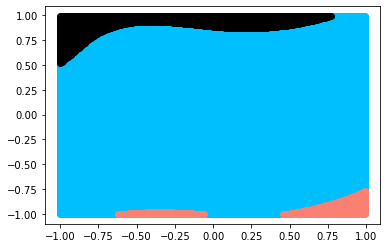

4.115154266357422


In [6]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[0, 1, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 0, 1] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [1, 0, 0] for p in X])

def index(lis):
    count = 0
    elt = 0
    for i in range(0, len(lis)):
        if(lis[i] > elt):
            count = i
            elt = lis[i]
    return count

t1 = time.time()

color_1 = "deepskyblue"
color_2 = "black"
color_3 = "salmon"    
            
###MLP

XF = X.flatten().tolist()
YF = Y.flatten().tolist()

layer_count = 3
input_count = 2
hidden_count = 25
output_count = 3

nn = r.create_nn(layer_count, input_count, hidden_count, output_count)

print("_")
r.train_nn(nn, XF, YF, 100, 0.003, True)

points_x1_blue = []
points_x2_blue = []
points_x1_red = []
points_x2_red = []
points_x1_green = []
points_x2_green = []
for i in np.arange(-1.0, 1.0, 0.01):
    for j in np.arange(-1.0, 1.0, 0.01):
        value = r.predict_nn(nn, np.array([i, j], float), True, output_count).tolist()
        print(value)
        idx = index(value)
#         print(idx)
        if idx == 0:
            points_x1_blue.append(i)
            points_x2_blue.append(j)
        elif idx == 1:
            points_x1_red.append(i)
            points_x2_red.append(j)
        elif idx == 2:
            points_x1_green.append(i)
            points_x2_green.append(j)
            

# plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
# plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
# plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
# plt.show()

# plt.scatter(points_x1_blue, points_x2_blue, c=color_1)
# plt.scatter(points_x1_red, points_x2_red, c=color_2)
# plt.scatter(points_x1_green, points_x2_green, c=color_3)
# plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
# plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
# plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
# plt.show()


# plt.clf()
plt.scatter(points_x1_blue, points_x2_blue, c=color_1)
plt.scatter(points_x1_red, points_x2_red, c=color_2)
plt.scatter(points_x1_green, points_x2_green, c=color_3)
plt.show()

r.release_nn(nn)

t2 = time.time()
print(t2 - t1)

## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [4]:
X = np.array([
      [1],
      [2]
])
Y = np.array([
      2,
      3
])

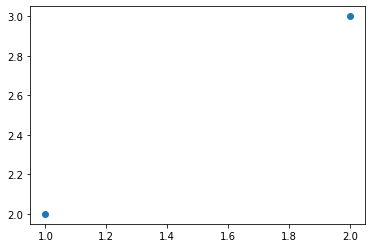

<Figure size 432x288 with 0 Axes>

In [29]:
plt.scatter(X,Y)
plt.show()
plt.clf()

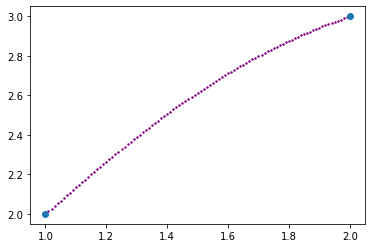

<Figure size 432x288 with 0 Axes>

In [5]:
###MLP

XF = X.flatten().tolist()
YF = Y.flatten().tolist()

# print(XF)
# print(YF)

layer_count = 3
input_count = 1
hidden_count = 10
output_count = 1

nn = r.create_nn(layer_count, input_count, hidden_count, output_count)

r.train_nn(nn, XF, YF, 500, 0.03, False)


for i in np.arange(1.0, 2.0, 0.01):
    value = r.predict_nn(nn, [i], False, 1)
    plt.scatter(i, value[0], c="purple", s=2)

plt.scatter(X,Y)
plt.show()
plt.clf()

r.release_nn(nn)

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [7]:
X = np.array([
      [1],
      [2],
      [3]
])
Y = np.array([
      2,
      3,
      2.5
])

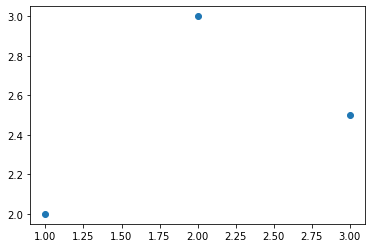

<Figure size 432x288 with 0 Axes>

In [7]:
plt.scatter(X,Y)
plt.show()
plt.clf()

[1, 2, 3]
[2.0, 3.0, 2.5]


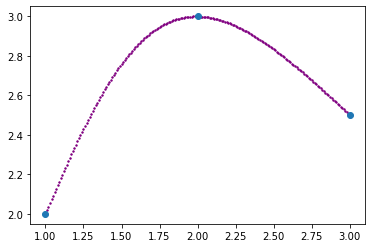

<Figure size 432x288 with 0 Axes>

In [8]:
###MLP

XF = X.flatten().tolist()
YF = Y.flatten().tolist()

print(XF)
print(YF)

layer_count = 3
input_count = 1
hidden_count = 10
output_count = 1

nn = r.create_nn(layer_count, input_count, hidden_count, output_count)

r.train_nn(nn, XF, YF, 1000, 0.01, False)


for i in np.arange(1.0, 3.0, 0.01):
    value = r.predict_nn(nn, [i], False, 1)
    plt.scatter(i, value[0], c="purple", s=2)

plt.scatter(X,Y)
plt.show()
plt.clf()

r.release_nn(nn)

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [14]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
])
Y = np.array([
      2,
      3,
      2.5
])

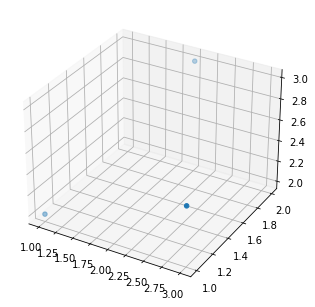

<Figure size 432x288 with 0 Axes>

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

[1, 1, 2, 2, 3, 1]
[2.0, 3.0, 2.5]


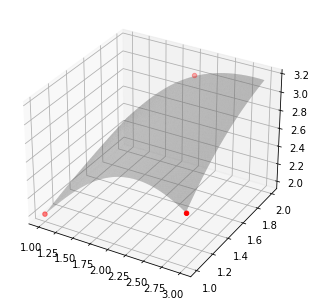

In [26]:
###MLP

XF = X.flatten().tolist()
YF = Y.flatten().tolist()

print(XF)
print(YF)

layer_count = 3
input_count = 2
hidden_count = 5
output_count = 1

nn = r.create_nn(layer_count, input_count, hidden_count, output_count)

r.train_nn(nn, XF, YF, 1000, 0.01, False)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:,1], Y, color="red")

XX, YY, res = [], [], []

for i in np.arange(1.0, 3.0, 0.01):
    for j in np.arange(1.0, 2.0, 0.01):
        value = r.predict_nn(nn, [i, j], False, 1)
        XX.append(i)
        YY.append(j)
        res.append(value[0])
#         plt.scatter(i, value[0], c="purple", s=2)

ax.plot_trisurf(XX, YY, res, lw=0, color="grey", alpha=0.5)
plt.show()

r.release_nn(nn)

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [35]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      1,
      2,
      3
])

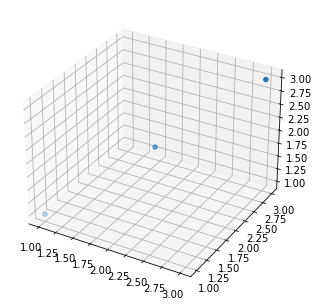

<Figure size 432x288 with 0 Axes>

In [21]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

[1, 1, 2, 2, 3, 3]
[1, 2, 3]


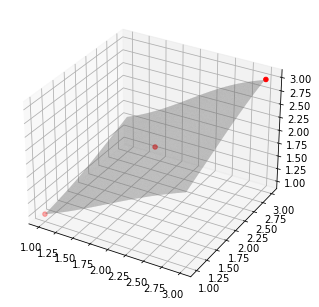

In [36]:
###MLP

XF = X.flatten().tolist()
YF = Y.flatten().tolist()

print(XF)
print(YF)

layer_count = 3
input_count = 2
hidden_count = 5
output_count = 1

nn = r.create_nn(layer_count, input_count, hidden_count, output_count)

r.train_nn(nn, XF, YF, 1000, 0.01, False)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:,1], Y, color="red")

XX, YY, res = [], [], []

for i in np.arange(1.0, 3.0, 0.01):
    for j in np.arange(1.0, 3.0, 0.01):
        value = r.predict_nn(nn, [i, j], False, 1)
        XX.append(i)
        YY.append(j)
        res.append(value[0])
#         plt.scatter(i, value[0], c="purple", s=2)

ax.plot_trisurf(XX, YY, res, lw=0, color="grey", alpha=0.5)
plt.show()

r.release_nn(nn)

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [15]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
Y = np.array([
      2,
      1,
      -2,
      -1
])

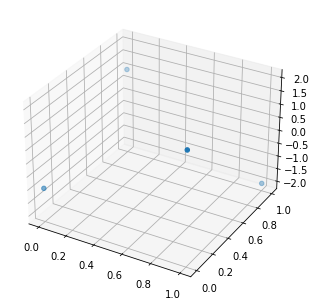

<Figure size 432x288 with 0 Axes>

In [16]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

[1, 0, 0, 1, 1, 1, 0, 0]
[2, 1, -2, -1]


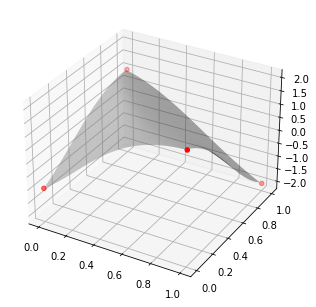

In [21]:
###MLP

XF = X.flatten().tolist()
YF = Y.flatten().tolist()

print(XF)
print(YF)

layer_count = 3
input_count = 2
hidden_count = 5
output_count = 1

nn = r.create_nn(layer_count, input_count, hidden_count, output_count)

r.train_nn(nn, XF, YF, 1000, 0.01, False)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:,1], Y, color="red")

XX, YY, res = [], [], []

for i in np.arange(0.0, 1.0, 0.01):
    for j in np.arange(0.0, 1.0, 0.01):
        value = r.predict_nn(nn, [i, j], False, 1)
        XX.append(i)
        YY.append(j)
        res.append(value[0])
#         plt.scatter(i, value[0], c="purple", s=2)

ax.plot_trisurf(XX, YY, res, lw=0, color="grey", alpha=0.5)
plt.show()

r.release_nn(nn)